# ML 분반 Week6 (SVM & DT) 실습

In [ ]:
!pip install graphviz

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

df = pd.read_csv('market.csv')
df

,price,join,credit,FraudOrNot
0,33,0,NO,NORMAL
1,67,5,YES,FRAUD
2,78,26,NO,NORMAL
3,74,0,NO,FRAUD
4,57,24,NO,FRAUD
5,76,20,YES,NORMAL
6,16,30,YES,FRAUD
7,55,8,YES,FRAUD
8,35,13,NO,FRAUD
9,48,14,NO,FRAUD


In [ ]:
# 종속변수는 범주형변수여도 됨. 단, 설명변수는 get_dummies 필수
df = pd.get_dummies(df, columns = ['credit'])
df

- criterion: 분할 품질을 측정하는 데 사용되는 함수

  'gini' (기본값): 지니 불순도를 사용합니다.

  'entropy': 정보 이득을 사용합니다.

- splitter: 각 노드에서 분할을 선택하는 전략입니다.

  'best' (기본값): 가능한 모든 분할 중에서 최적의 분할을 선택합니다.

  'random': 각 노드에서 분할할 때 무작위로 선택된 분할을 고려합니다.

- max_depth: 트리의 최대 깊이입니다. 지정하지 않으면 노드가 순수하거나

- min_samples_split보다 적은 샘플을 가질 때까지 계속 확장합니다.

- min_samples_split: 내부 노드를 분할하는 데 필요한 최소 샘플 수입니다. 기본값은 2입니다.

- min_samples_leaf: 리프 노드에 있어야 하는 최소 샘플 수입니다. 기본값은 1입니다.

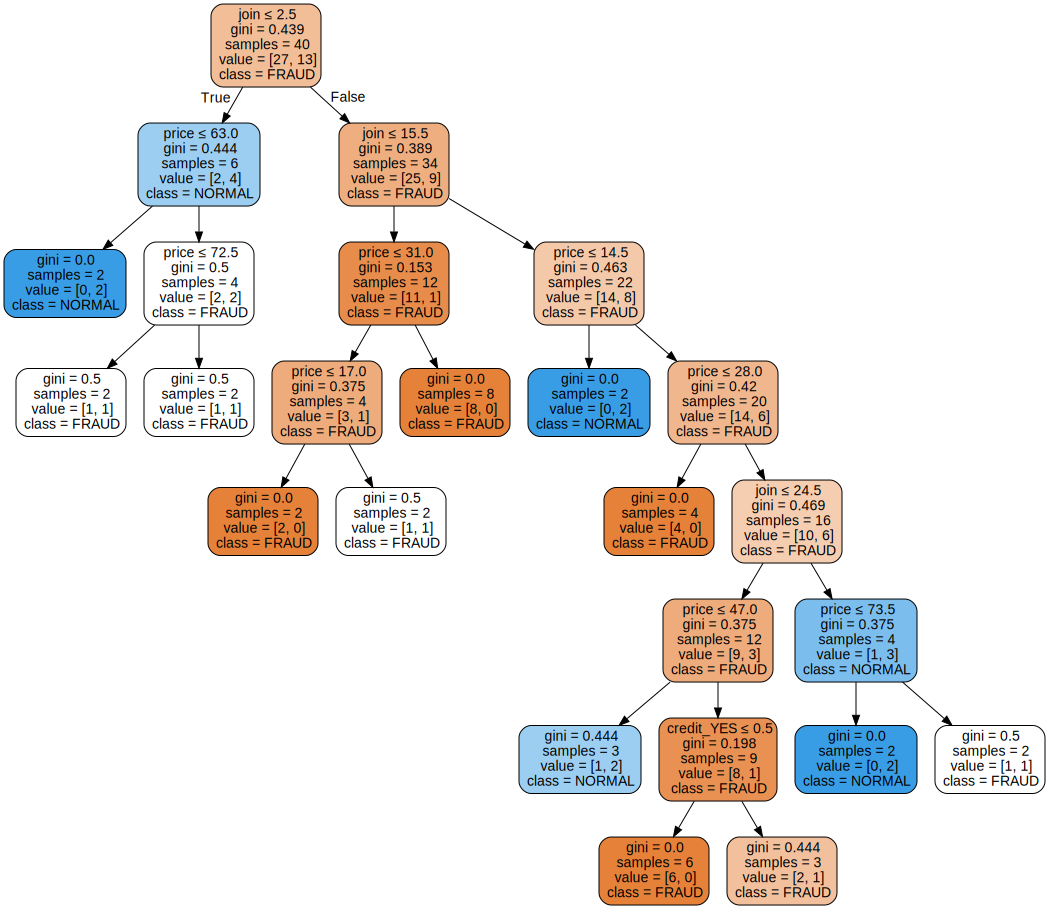

In [ ]:
# 어차피 같은 의미의 열임 (credit_no, credit_yes) -> 사실 상 하나의 열만 택할 필요가 있음
df_x = df.iloc[:, [0, 1, 4]]
df_y = df['FraudOrNot']

tree_model = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf=2)
tree_model.fit(df_x, df_y)
dot_data = export_graphviz(tree_model, out_file=None, feature_names=df_x.columns, class_names=tree_model.classes_, filled=True, rounded=True, special_characters=True)

graph=graphviz.Source(dot_data)
graph

# 왼쪽 하단은 min_samples_leaf가 2보다 작아서 더 이상 leaf가 없음
# 의사결정나무는 불필요한 변수를 분류예측에 활용하지 않는다는 장점 (필요한 것만 사용)